# Ethereum Forcasting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
# Importing the necessary libraries
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import date, timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

# Downloading the dataset
today = date.today()
end_date = today.strftime("%Y-%m-%d")
start_date = (today - timedelta(days=5000)).strftime("%Y-%m-%d")
df = yf.download("ETH-USD", start=start_date, end=end_date, progress=False)

In [2]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...
2024-04-08,3453.498779,3727.616455,3409.511719,3695.292725,3695.292725,19055143129
2024-04-09,3695.341797,3724.922363,3455.107666,3505.163330,3505.163330,18279773833
2024-04-10,3505.156006,3561.516357,3415.180420,3543.737061,3543.737061,16872482726


In [3]:
df.sort_index(axis=0, inplace=True)

In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...
2024-04-08,3453.498779,3727.616455,3409.511719,3695.292725,3695.292725,19055143129
2024-04-09,3695.341797,3724.922363,3455.107666,3505.163330,3505.163330,18279773833
2024-04-10,3505.156006,3561.516357,3415.180420,3543.737061,3543.737061,16872482726


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2347 entries, 2017-11-09 to 2024-04-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2347 non-null   float64
 1   High       2347 non-null   float64
 2   Low        2347 non-null   float64
 3   Close      2347 non-null   float64
 4   Adj Close  2347 non-null   float64
 5   Volume     2347 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 128.4 KB


## Preprocessing

In [6]:
def format_data(num):
    nums = num.split(',');
    if(len(nums) == 2):
        n = float(nums[0] + nums[1])
    else:
        n = float(nums[0])
    return n

In [7]:
df['Price'] = df['Price'].apply(format_data)

KeyError: 'Price'

In [8]:
df['Open'] = df['Open'].apply(format_data)

AttributeError: 'float' object has no attribute 'split'

In [9]:
df['High'] = df['High'].apply(format_data)

AttributeError: 'float' object has no attribute 'split'

In [10]:
df['Low'] = df['Low'].apply(format_data)

AttributeError: 'float' object has no attribute 'split'

In [11]:
def format_vol(x):
    if(x[-1] == 'K'):
        n = float(x[:-1]) * 1000
    elif(x[-1] == 'M'):
        n = float(x[:-1]) * 1000000
    elif(x == '-'):
        n = 0
    return n

In [12]:
df['Vol.'] = df['Vol.'].apply(format_vol)

KeyError: 'Vol.'

In [13]:
def formate_change(x):
    n = float(x[:-1])
    return n

In [14]:
df['Change %'] = df['Change %'].apply(formate_change)

KeyError: 'Change %'

In [15]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...
2024-04-08,3453.498779,3727.616455,3409.511719,3695.292725,3695.292725,19055143129
2024-04-09,3695.341797,3724.922363,3455.107666,3505.163330,3505.163330,18279773833
2024-04-10,3505.156006,3561.516357,3415.180420,3543.737061,3543.737061,16872482726


In [16]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [17]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2347 entries, 2017-11-09 to 2024-04-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2347 non-null   float64
 1   High       2347 non-null   float64
 2   Low        2347 non-null   float64
 3   Close      2347 non-null   float64
 4   Adj Close  2347 non-null   float64
 5   Volume     2347 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 128.4 KB


## Resampling Data

A - Year, M - Month End, W - Weekly, D - Daily, MS - Month Start

In [19]:
monthly_df = df['Open'].resample('MS').mean()

In [20]:
monthly_df

Date
2017-11-01     373.696317
2017-12-01     630.583997
2018-01-01    1093.099893
2018-02-01     882.527006
2018-03-01     640.787129
                 ...     
2023-12-01    2254.422277
2024-01-01    2375.056200
2024-02-01    2710.419644
2024-03-01    3618.246062
2024-04-01    3453.943380
Freq: MS, Name: Open, Length: 78, dtype: float64

## Visulization

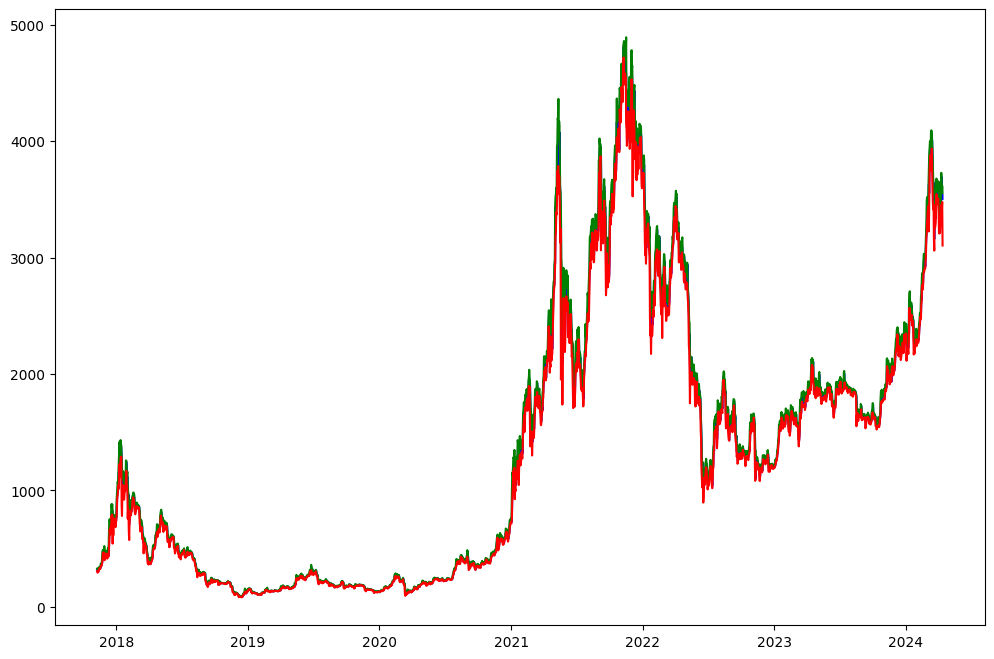

In [21]:
plt.figure(figsize=(12, 8))
plt.plot(df['Open'], color='blue')
plt.plot(df['High'], color='green')
plt.plot(df['Low'], color='red')

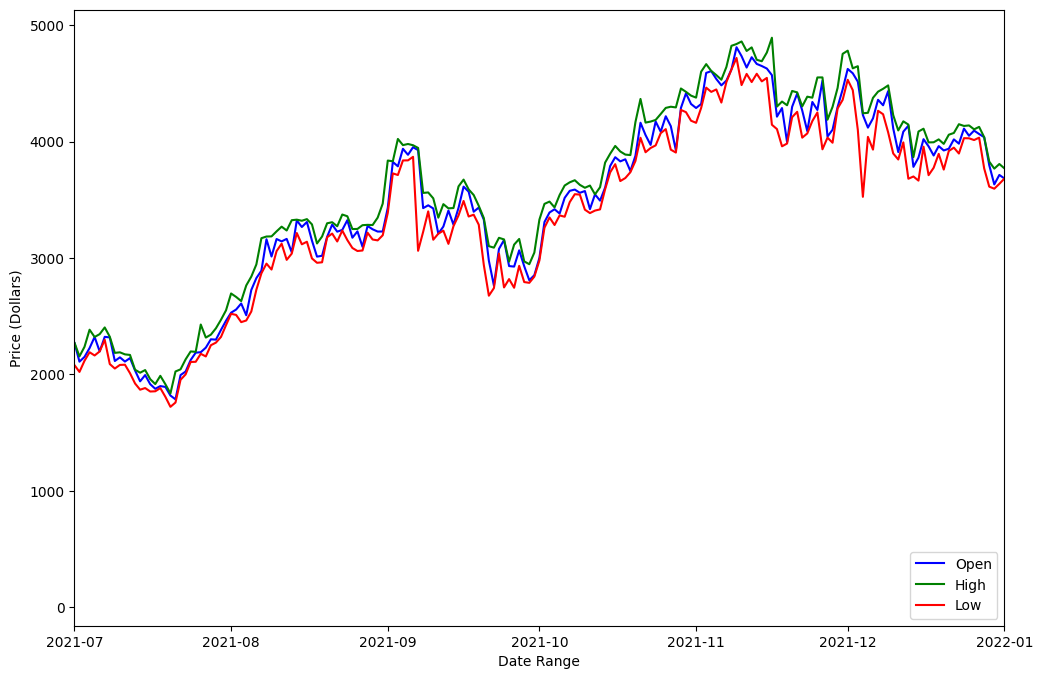

In [22]:
plt.figure(figsize=(12, 8))
plt.plot(df['Open'], color='blue', label="Open")
plt.plot(df['High'], color='green', label="High")
plt.plot(df['Low'], color='red', label="Low")
plt.xlim(datetime.date(2021, 7, 1), datetime.date(2022, 1, 1))
plt.xlabel("Date Range")
plt.ylabel("Price (Dollars)")
plt.legend(loc="lower right")

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(df['Change %'])

KeyError: 'Change %'

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Date'>

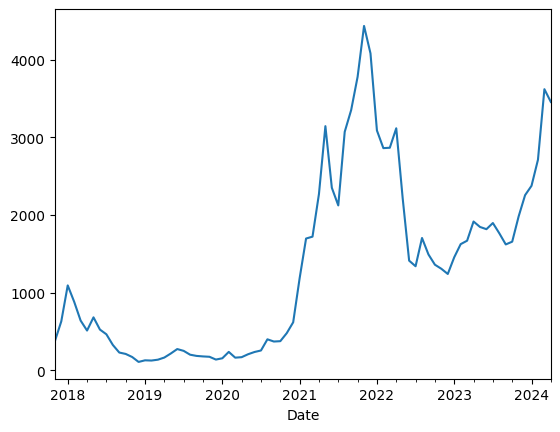

In [24]:
# Monthly Data plotting
monthly_df.plot()

Text(0, 0.5, 'Open cost')

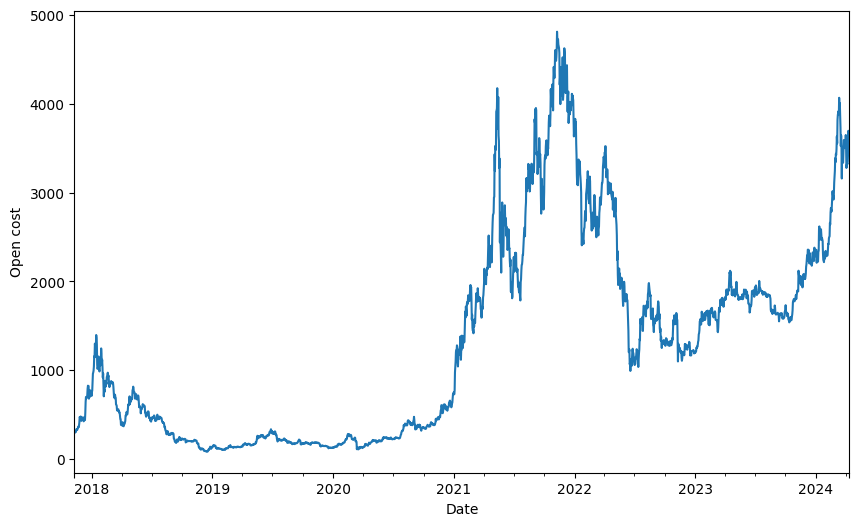

In [25]:
plt.figure(figsize=(10, 6))
df['Open'].plot()
plt.ylabel('Open cost')

Is this data stationary? (means mean, variance and covariance is constant over time.)

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

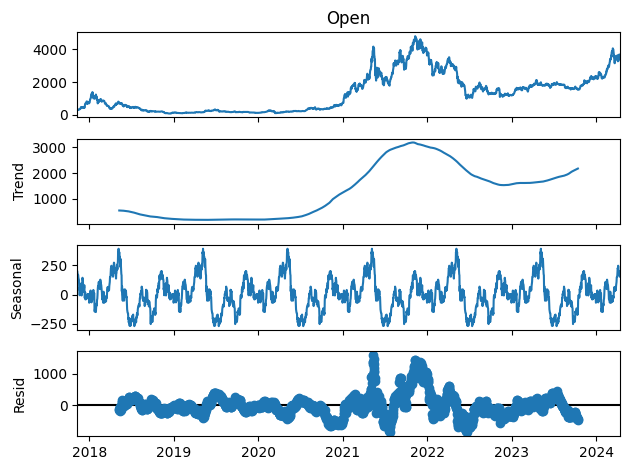

In [27]:
decomposition = seasonal_decompose(df['Open'], model='additive', period=365)
fig = decomposition.plot()
plt.show()

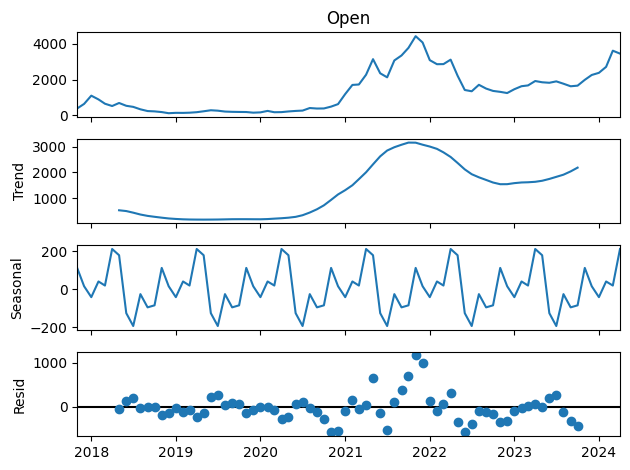

In [28]:
decomposition = seasonal_decompose(monthly_df, model='additive')
fig = decomposition.plot()
plt.show()

### To check if data is stationary

In [29]:
from statsmodels.tsa.stattools import adfuller

In [30]:
# h0: It is non stationary
# h1: It is stationary

def adfuller_test(data):
    result = adfuller(data)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of observations Used']
    for value, label in zip(result, labels):
        print(label+" : "+str(value))
    if result[1] <= 0.05:
        print("String evidence against the null hypothesis(h0), reject the null hypothesis. Data has no unit root and is stationary.")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.")

In [31]:
adfuller_test(df['Open'])

ADF Test Statistic : -1.0145842253077642
p-value : 0.7479079439601469
#Lags Used : 17
Number of observations Used : 2329
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


In [32]:
adfuller_test(monthly_df)

ADF Test Statistic : -1.226596455878805
p-value : 0.6620512424017573
#Lags Used : 3
Number of observations Used : 74
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


## Making Stationary

In [33]:
p_values = []
for i in range(1, 62):
    tdf = df['Open'].diff(periods=i)
    res = adfuller(tdf.dropna())
    p_values.append([i, res[1]])
p_values.sort(key = lambda x: x[1])
p_values[:10]

[[1, 3.2133405437611833e-22],
 [28, 1.7526816652403385e-17],
 [29, 1.1512683247137058e-15],
 [30, 2.2348361651684882e-15],
 [31, 1.491228570530004e-14],
 [14, 2.078353936032699e-14],
 [34, 7.502970012852287e-14],
 [32, 1.794893875046461e-13],
 [2, 2.0774231222185156e-13],
 [33, 3.9155054879673443e-13]]

In [34]:
rate_diff = df['Open'].diff(periods=27)
rate_diff.dropna(inplace=True)

In [35]:
rate_diff

Date
2017-12-06    153.959015
2017-12-07    105.697998
2017-12-08    136.403015
2017-12-09    142.653992
2017-12-10    165.764008
                 ...    
2024-04-08   -613.191650
2024-04-09   -284.923340
2024-04-10   -500.589111
2024-04-11   -339.404785
2024-04-12   -230.775146
Name: Open, Length: 2320, dtype: float64

In [36]:
adfuller_test(rate_diff)

ADF Test Statistic : -5.814888829750516
p-value : 4.315493380546896e-07
#Lags Used : 27
Number of observations Used : 2292
String evidence against the null hypothesis(h0), reject the null hypothesis. Data has no unit root and is stationary.


<Axes: xlabel='Date'>

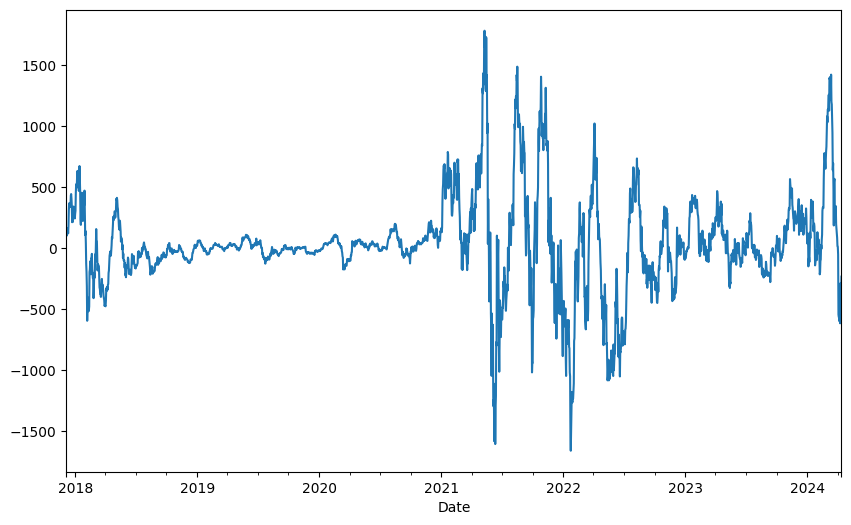

In [37]:
plt.figure(figsize=(10, 6))
rate_diff.plot()

Monthly data

In [38]:
p_values = []
for i in range(1, 12):
    tdf = monthly_df.diff(periods=i)
    res = adfuller(tdf.dropna())
    p_values.append([i, res[1]])
p_values.sort(key = lambda x: x[1])
p_values

[[8, 0.0019095753428624248],
 [1, 0.002631342084247653],
 [5, 0.016841109745279217],
 [11, 0.02843981691190516],
 [6, 0.04741914621983928],
 [2, 0.06153289166496032],
 [4, 0.08029450067065103],
 [3, 0.08350867784941379],
 [7, 0.1345933344886029],
 [10, 0.14548795890203742],
 [9, 0.38568145231371054]]

In [39]:
seasonal_monthly_df = monthly_df.diff(periods=9)

In [40]:
seasonal_monthly_df

Date
2017-11-01            NaN
2017-12-01            NaN
2018-01-01            NaN
2018-02-01            NaN
2018-03-01            NaN
                 ...     
2023-12-01     585.933440
2024-01-01     459.904588
2024-02-01     865.113448
2024-03-01    1801.638148
2024-04-01    1558.084517
Freq: MS, Name: Open, Length: 78, dtype: float64

In [41]:
adfuller_test(seasonal_monthly_df.dropna())

ADF Test Statistic : -1.7895110650809651
p-value : 0.38568145231371054
#Lags Used : 9
Number of observations Used : 59
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


<Axes: xlabel='Date'>

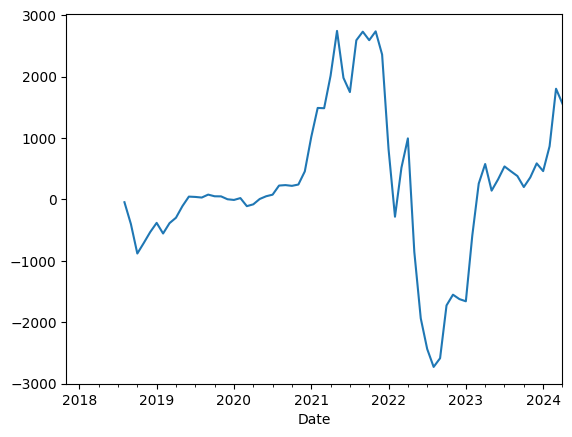

In [42]:
seasonal_monthly_df.plot()

## Visulizing PACF and ACF Plots

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

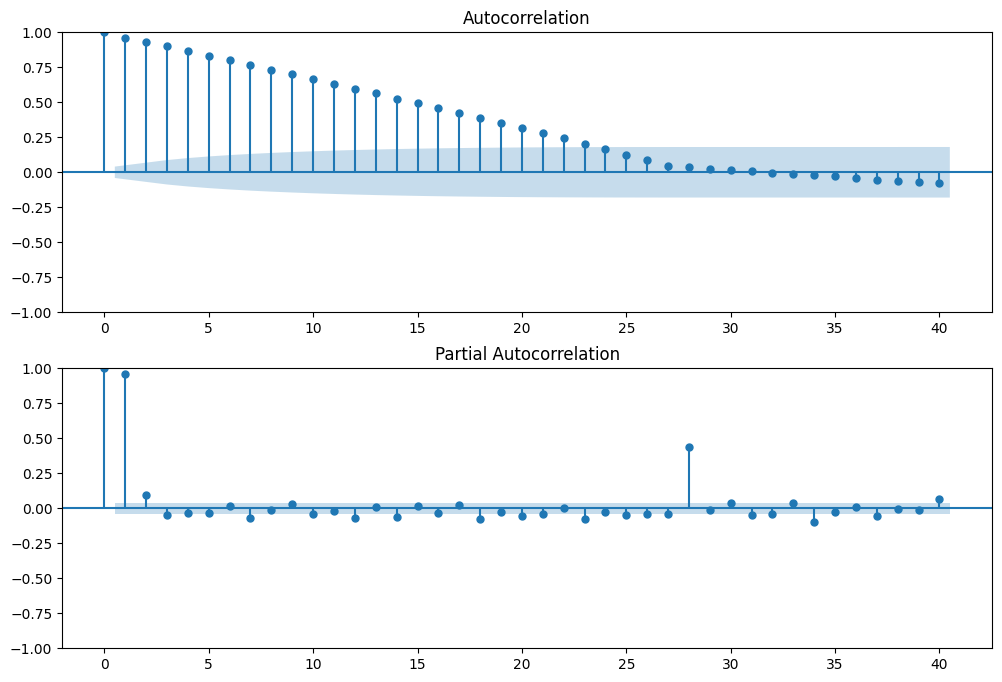

In [44]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(rate_diff.dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(rate_diff.dropna(), lags=40, ax=ax2)

AR value must be 2 (p). q will be 0

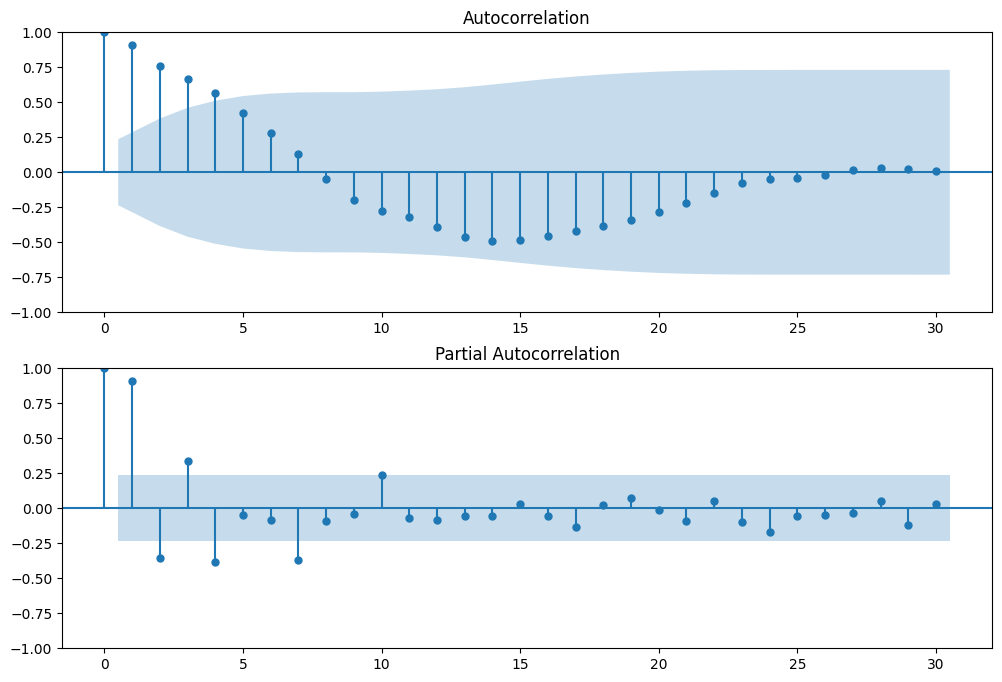

In [45]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(seasonal_monthly_df.dropna(), lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(seasonal_monthly_df.dropna(), lags=30, ax=ax2)

AR value must be 2 (p). q will be 0

## Modeling

In [46]:
# Spliting the data into training and testing
X = df['Open']
print("Total Length of data:",len(X))
print("93% of data will be:", len(X)*0.93)
train_limit = int(len(X)*0.93)

Total Length of data: 2347
93% of data will be: 2182.71


In [47]:
train_x = X[:train_limit]
test_x = X[train_limit:]

In [48]:
test_x

Date
2023-10-31    1810.131592
2023-11-01    1815.872070
2023-11-02    1847.259888
2023-11-03    1800.916504
2023-11-04    1833.368896
                 ...     
2024-04-08    3453.498779
2024-04-09    3695.341797
2024-04-10    3505.156006
2024-04-11    3543.452148
2024-04-12    3505.329834
Name: Open, Length: 165, dtype: float64

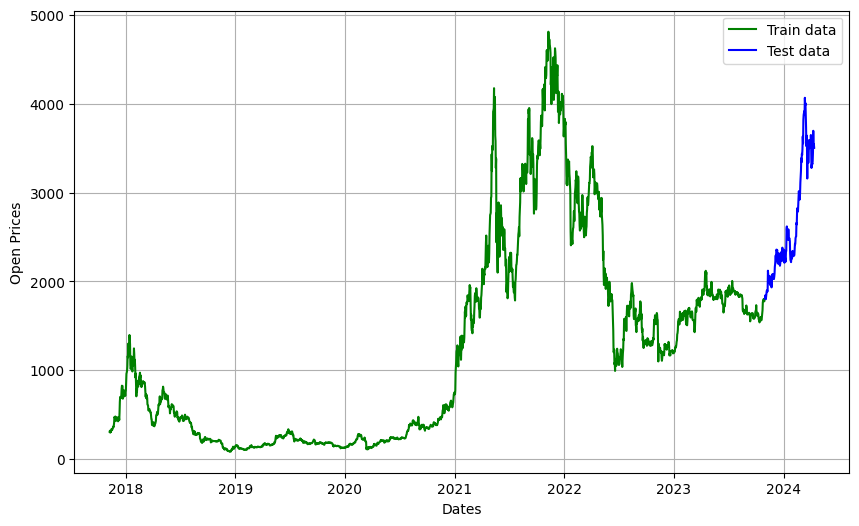

In [49]:
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.xlabel("Dates")
plt.ylabel("Open Prices")
plt.plot(train_x, 'green', label='Train data')
plt.plot(test_x, 'blue', label='Test data')
plt.legend()

##  ARIMA Model

In [50]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [51]:
model_arima = ARIMA(train_x, order=(4, 1, 0))
model_arima_fit = model_arima.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [52]:
arima_pred = model_arima_fit.predict(start=train_limit, end=len(X)-1)

In [53]:
arima_pred_df = pd.DataFrame(arima_pred)
arima_pred_df = arima_pred_df.set_index(test_x.index)
arima_pred_df

,predicted_mean
Date,
2023-10-31,1793.918629
2023-11-01,1793.461647
2023-11-02,1793.893582
2023-11-03,1794.482116
2023-11-04,1794.371034
...,...
2024-04-08,1794.431771
2024-04-09,1794.431771
2024-04-10,1794.431771


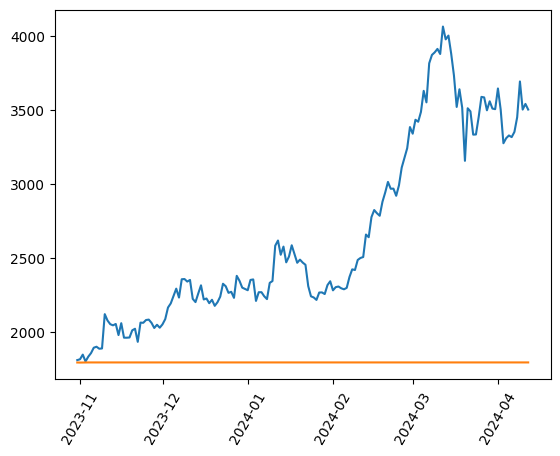

In [54]:
plt.plot(test_x)
plt.plot(arima_pred_df)
plt.xticks(rotation=60)
# plt.xlim(datetime.date(2021, 1, 1), datetime.date(2021, 5, 1))
plt.show()

As we can see that it does not do a good job as it is a very basic model and does not have seasonality involved.

In [55]:
monthly_df

Date
2017-11-01     373.696317
2017-12-01     630.583997
2018-01-01    1093.099893
2018-02-01     882.527006
2018-03-01     640.787129
                 ...     
2023-12-01    2254.422277
2024-01-01    2375.056200
2024-02-01    2710.419644
2024-03-01    3618.246062
2024-04-01    3453.943380
Freq: MS, Name: Open, Length: 78, dtype: float64

In [56]:
monthly_train_len = len(monthly_df)*0.9
monthly_train_len

70.2

In [57]:
monthly_df.index[64]

Timestamp('2023-03-01 00:00:00')

In [58]:
train_monthly = monthly_df[:int(monthly_train_len)]
test_monthly = monthly_df[int(monthly_train_len):]

In [59]:
model_monthly = ARIMA(train_monthly, order=(4, 1, 0))
model_arima_fit = model_monthly.fit()

In [60]:
arima_pred_monthly = model_arima_fit.predict(start=int(monthly_train_len), end=len(monthly_df)-1)

In [61]:
arima_pred_monthly_df = pd.DataFrame(arima_pred_monthly)
arima_pred_monthly_df.set_index(test_monthly.index, inplace=True)
arima_pred_monthly_df

,predicted_mean
Date,
2023-09-01,1670.425757
2023-10-01,1716.614521
2023-11-01,1725.728118
2023-12-01,1689.658115
2024-01-01,1693.612417
2024-02-01,1709.978466
2024-03-01,1702.437389
2024-04-01,1696.527808


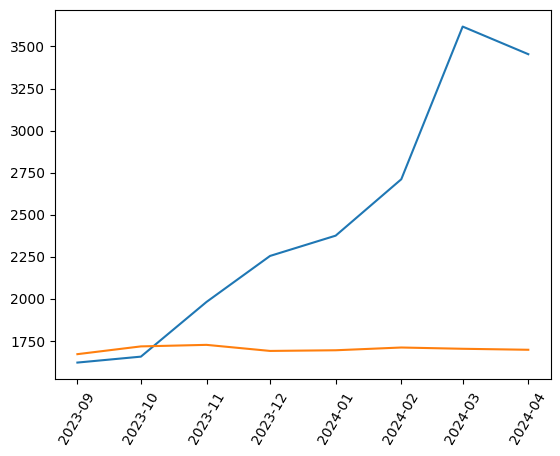

In [62]:
plt.plot(test_monthly)
plt.plot(arima_pred_monthly_df)
plt.xticks(rotation=60)
# plt.xlim(datetime.date(2016, 5, 13), datetime.date(2016, 5, 20))
plt.show()

## ARIMA Model with updating train with current data

In [63]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [64]:
training_data = list(train_x)
testing_data = list(test_x)

In [65]:
model_predictions = []
n_test_obser = len(testing_data)

In [66]:
for i in range(n_test_obser):
    model = ARIMA(training_data, order = (4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    actual_test_value = testing_data[i]
    training_data.append(actual_test_value)

In [67]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2346
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -13490.472
Date:                Sat, 13 Apr 2024   AIC                          26990.944
Time:                        11:13:24   BIC                          27019.744
Sample:                             0   HQIC                         27001.434
                               - 2346                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0836      0.011     -7.842      0.000      -0.104      -0.063
ar.L2          0.0114      0.010      1.132      0.258      -0.008       0.031
ar.L3          0.0442      0.011      4.158      0.0

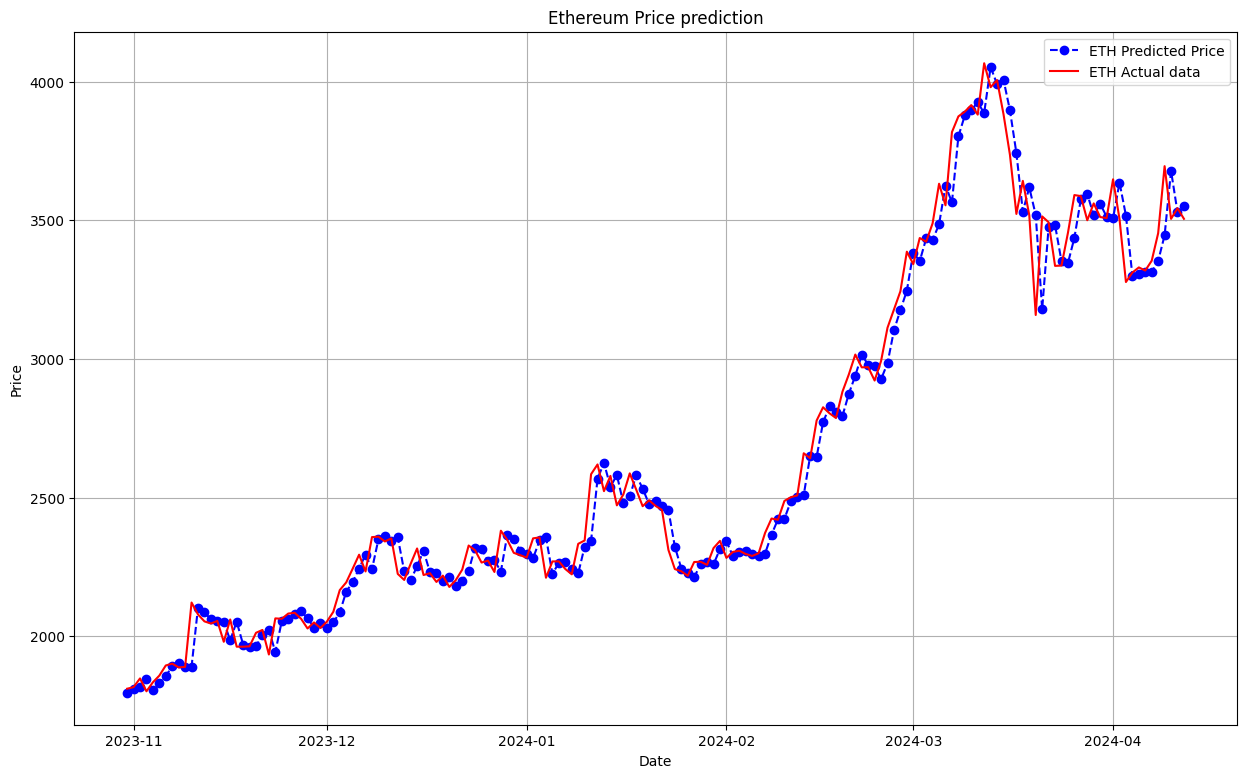

In [68]:
plt.figure(figsize=(15, 9))
plt.grid()

date_range = df[train_limit:].index
plt.plot(date_range, model_predictions, color='blue', marker='o', linestyle='dashed', label="ETH Predicted Price")
plt.plot(date_range, testing_data, color='red', label='ETH Actual data')

plt.title('Ethereum Price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [69]:
# Mean absolute percentage error
mape = np.mean(np.abs(np.array(model_predictions) - np.array(testing_data))/np.abs(testing_data))
print("MAPE:", mape)

MAPE: 0.022365910658498907


In [70]:
mean_squared_error(testing_data, model_predictions)

7903.576018127759

In [71]:
np.mean(testing_data)

2648.309099047112

## SARIMA

In [72]:
import statsmodels.api as sm

From above:  
AR value must be 2 (p). q will be 0. d = 1, season = 27  
AR value must be 2 (p). q will be 0. d = 1, season = 9

In [73]:
sarima_model_daily = sm.tsa.statespace.SARIMAX(train_x, order=(2, 1, 0), seasonal_order=(2, 1, 0, 27))
result_daily = sarima_model_daily.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


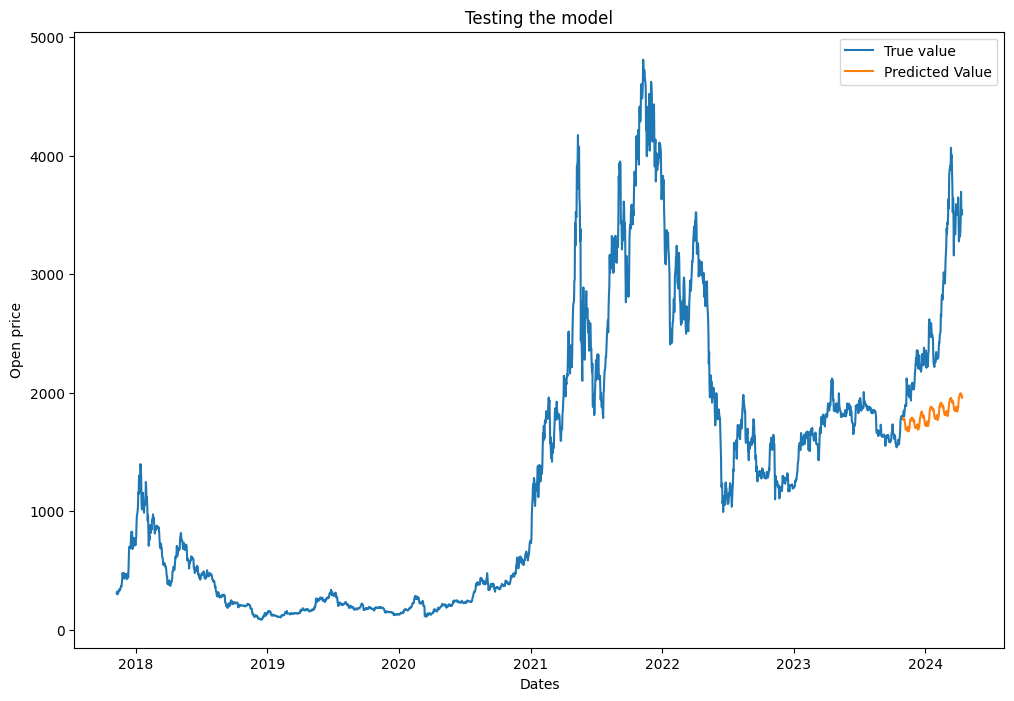

In [74]:
plt.figure(figsize=(12, 8))
daily_prediction = result_daily.predict(start=train_limit, end=len(X)-1)
plt.plot(X.index, X, label="True value")
plt.plot(daily_prediction, label="Predicted Value")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Testing the model")
plt.legend()

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [76]:
daily_prediction

2023-10-31    1786.787746
2023-11-01    1787.697290
2023-11-02    1770.519186
2023-11-03    1780.668484
2023-11-04    1772.693561
                 ...     
2024-04-08    1994.857335
2024-04-09    1984.556277
2024-04-10    1977.732761
2024-04-11    1978.086312
2024-04-12    1956.004714
Freq: D, Name: predicted_mean, Length: 165, dtype: float64

In [77]:
X[train_limit:]

Date
2023-10-31    1810.131592
2023-11-01    1815.872070
2023-11-02    1847.259888
2023-11-03    1800.916504
2023-11-04    1833.368896
                 ...     
2024-04-08    3453.498779
2024-04-09    3695.341797
2024-04-10    3505.156006
2024-04-11    3543.452148
2024-04-12    3505.329834
Name: Open, Length: 165, dtype: float64

In [78]:
print("Mean of target value:", X[train_limit:].mean())
print("Mean Absolute error:", mean_absolute_error(X[train_limit:], daily_prediction))
print("Root mean squared error:", np.sqrt(mean_squared_error(X[train_limit:], daily_prediction)))

Mean of target value: 2648.309099047112
Mean Absolute error: 833.2816767255052
Root mean squared error: 1005.8958070158703


In [79]:
sarima_model_daily = sm.tsa.statespace.SARIMAX(df['Open'], order=(2, 1, 0), seasonal_order=(2, 1, 0, 27))
result_daily = sarima_model_daily.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


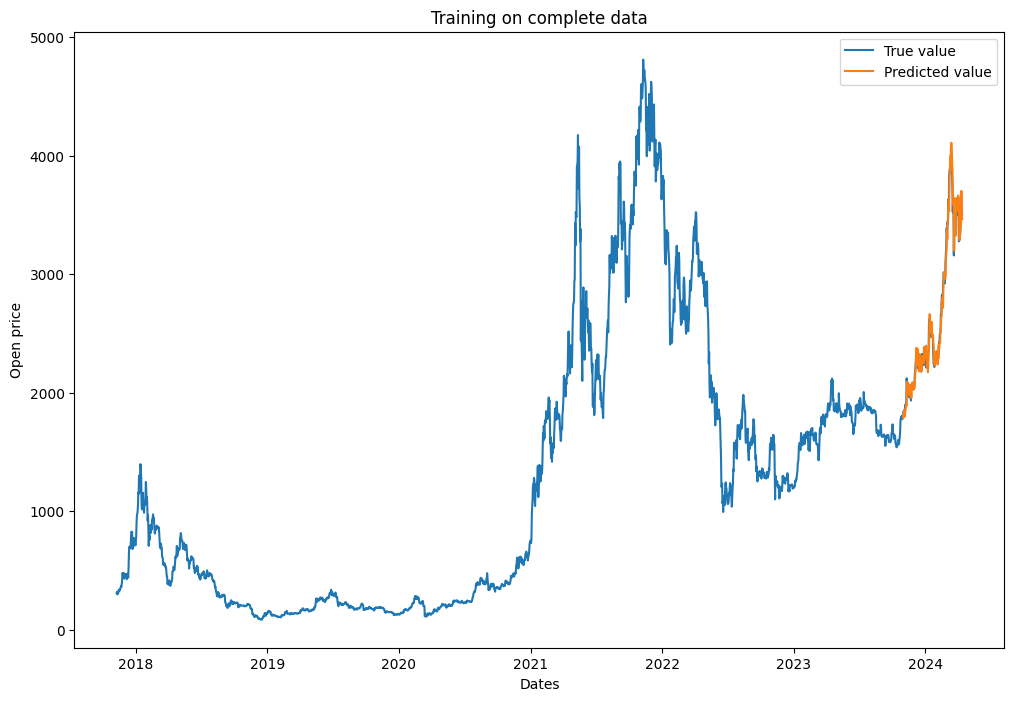

In [80]:
plt.figure(figsize=(12, 8))
daily_prediction = result_daily.predict(start=train_limit, end=len(X)-1)
plt.plot(X.index, X, label="True value")
plt.plot(daily_prediction, label="Predicted value")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Training on complete data")
plt.legend()

In [81]:
X_monthly = monthly_df
print("Total Length of data:",len(X_monthly))
print("90% of data will be:", len(X_monthly)*0.9)
train_limit_monthly = int(len(X_monthly)*0.9)

Total Length of data: 78
90% of data will be: 70.2


In [82]:
train_x_monthly = X_monthly[:train_limit_monthly]
test_x_monthly = X_monthly[train_limit_monthly:]

In [83]:
sarima_model_monthly = sm.tsa.statespace.SARIMAX(train_x_monthly, order=(2, 1, 0), seasonal_order=(1, 1, 0, 9))
result_monthly = sarima_model_monthly.fit()

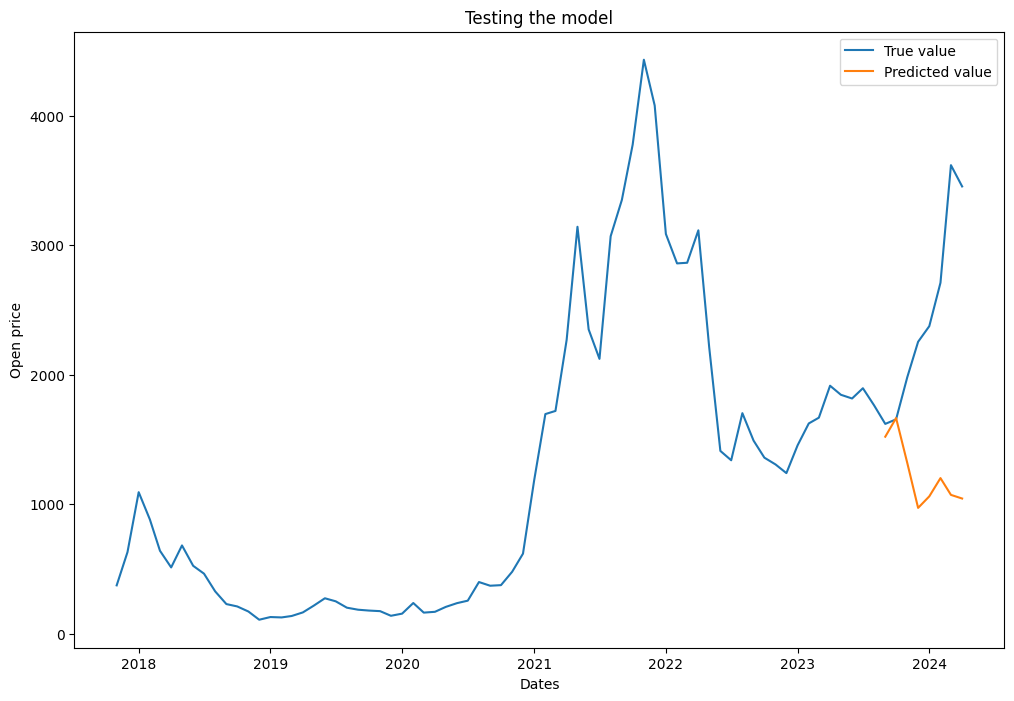

In [84]:
plt.figure(figsize=(12, 8))
monthly_prediction = result_monthly.predict(start=train_limit_monthly, end=len(X_monthly)-1)
plt.plot(X_monthly.index, X_monthly, label="True value")
plt.plot(monthly_prediction, label="Predicted value")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Testing the model")
plt.legend()

In [85]:
test_x_monthly

Date
2023-09-01    1620.422725
2023-10-01    1655.714930
2023-11-01    1981.063961
2023-12-01    2254.422277
2024-01-01    2375.056200
2024-02-01    2710.419644
2024-03-01    3618.246062
2024-04-01    3453.943380
Freq: MS, Name: Open, dtype: float64

In [86]:
monthly_prediction

2023-09-01    1521.562214
2023-10-01    1665.477949
2023-11-01    1318.652590
2023-12-01     971.854629
2024-01-01    1060.910399
2024-02-01    1201.950477
2024-03-01    1072.314055
2024-04-01    1044.282429
Freq: MS, Name: predicted_mean, dtype: float64

In [87]:
print("Mean of target value:", test_x_monthly.mean())
print("Mean Absolute error:", mean_absolute_error(test_x_monthly, monthly_prediction))
print("Root mean squared error:", np.sqrt(mean_squared_error(test_x_monthly, monthly_prediction)))

Mean of target value: 2458.6611473567227
Mean Absolute error: 1228.9763093114602
Root mean squared error: 1515.929228489239


In [88]:
sarima_model_monthly = sm.tsa.statespace.SARIMAX(monthly_df, order=(2, 1, 0), seasonal_order=(1, 1, 0, 9))
result_monthly = sarima_model_monthly.fit()

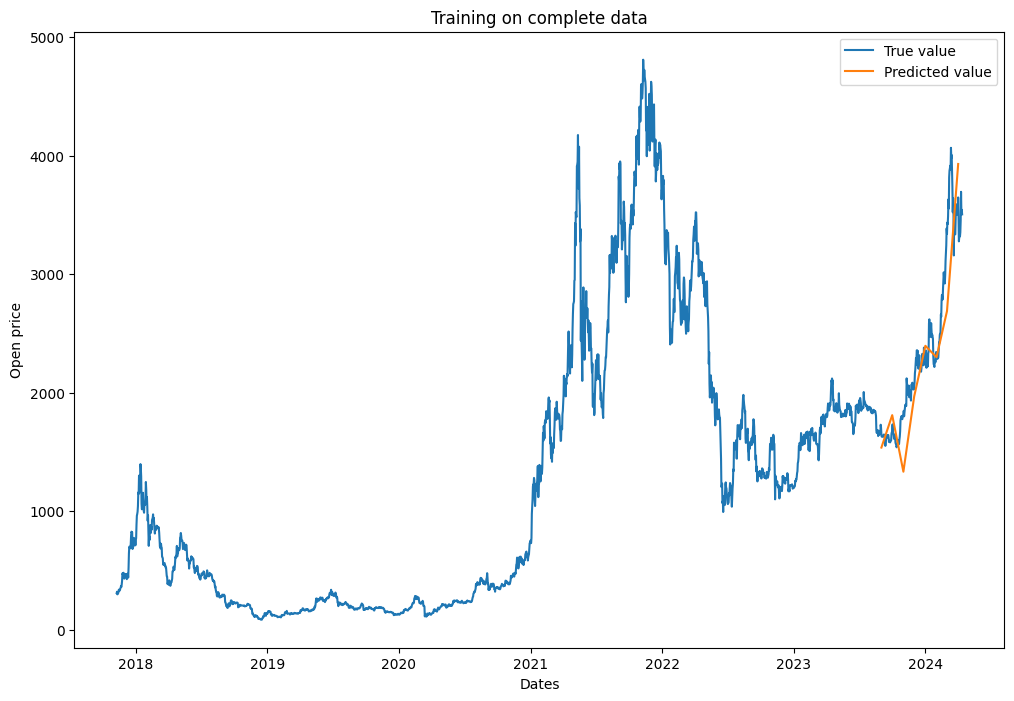

In [89]:
plt.figure(figsize=(12, 8))
monthly_prediction = result_monthly.predict(start=train_limit_monthly, end=len(X_monthly)-1)
plt.plot(X.index, X, label="True value")
plt.plot(monthly_prediction, label="Predicted value")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Training on complete data")
plt.legend()

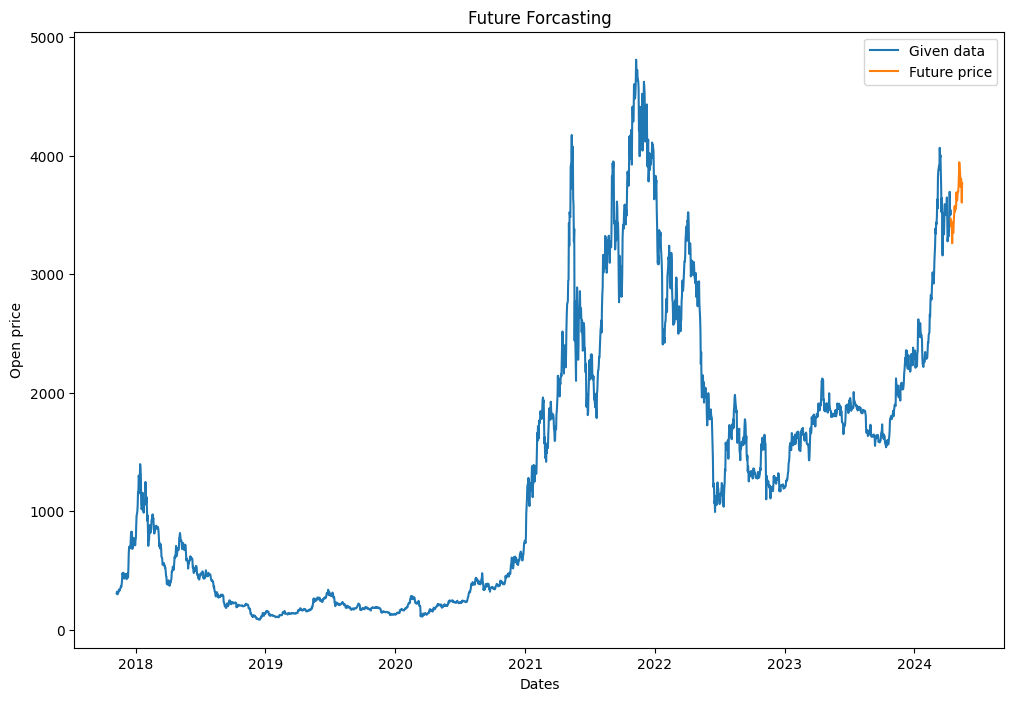

In [90]:
plt.figure(figsize=(12, 8))
future_pred = result_daily.predict(start=len(X)-1, end=len(X)+31)
plt.plot(X.index, X, label="Given data")
plt.plot(future_pred, label="Future price")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Future Forcasting")
plt.legend()

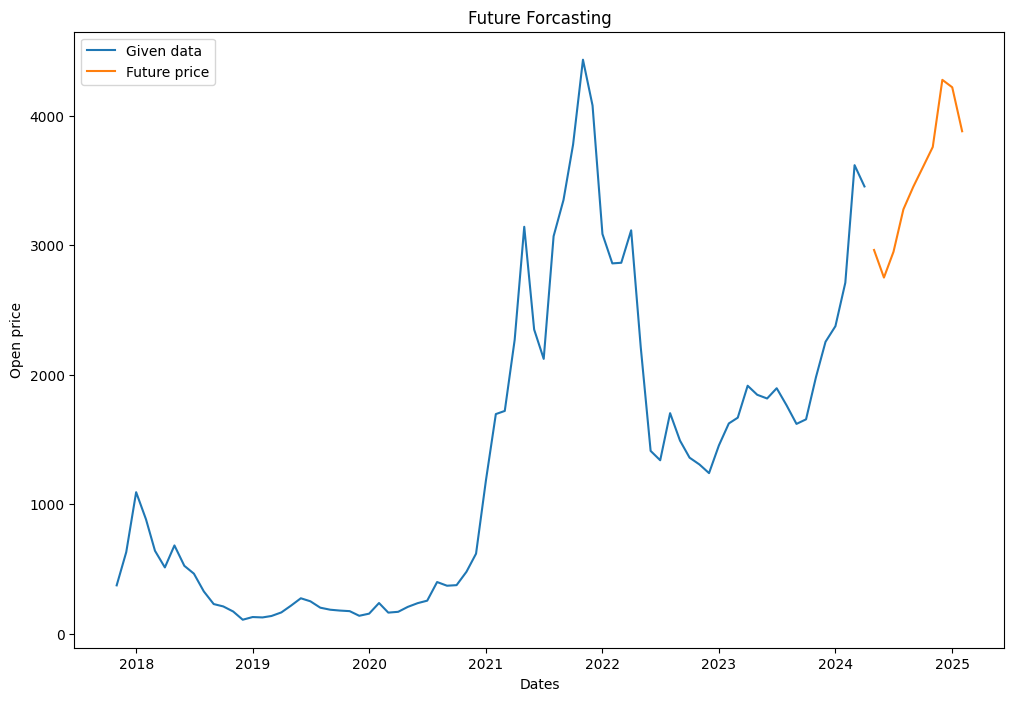

In [91]:
plt.figure(figsize=(12, 8))
future_pred_monthly = result_monthly.predict(start=len(X_monthly), end=len(X_monthly)+9)
plt.plot(X_monthly.index, X_monthly, label="Given data")
plt.plot(future_pred_monthly, label="Future price")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Future Forcasting")
plt.legend()

## Pickling The Models

In [92]:
import pickle

In [93]:
daily_model_path = 'ethereum_daily.pkl'
pickle.dump(result_daily, open(daily_model_path, 'wb'))

In [94]:
monthly_model_path = 'ethereum_monthly.pkl'
pickle.dump(result_monthly, open(monthly_model_path, 'wb'))